In [ ]:
pip install flexvalue --upgrade

In [1]:
import os

try:
    from google.colab import files
    os.environ['DATABASE_LOCATION'] = '.'
except:
    print("This is not being run in a colab, so the download functions will not work.")
    os.environ['DATABASE_LOCATION'] = '../'
    pass
import pandas as pd
from io import BytesIO

import sqlite3

This is not being run in a colab, so the download functions will not work.


In [ ]:
!flexvalue download-avoided-costs-data-db --year 2020

In [ ]:
!flexvalue download-avoided-costs-data-db --year 2021

In [2]:
db_filepath_2020 = os.path.join(os.environ['DATABASE_LOCATION'], "2020.db")
con_2020 = sqlite3.connect(db_filepath_2020)

db_filepath_2021 = os.path.join(os.environ['DATABASE_LOCATION'], "2021.db")
con_2021 = sqlite3.connect(db_filepath_2021)

## Electricity Analysis

In [159]:
# Enter a climate zone and utility to see the difference in the average avoided costs load shapes
CLIMATE_ZONE = 'CZ12'
UTILITY = 'PGE'

In [160]:
from flexvalue.db import get_filtered_acc_elec, get_filtered_acc_gas

df_elec_2020 = get_filtered_acc_elec('2020', UTILITY,CLIMATE_ZONE, '2020', '2050').sort_values('hour_of_year')
df_elec_2021 = get_filtered_acc_elec('2021', UTILITY,CLIMATE_ZONE, '2020', '2050').sort_values('hour_of_year')

In [161]:
list(df_elec_2020.columns)

['year',
 'month',
 'hour_of_day',
 'hour_of_year',
 'total',
 'energy',
 'losses',
 'ancillary_services',
 'capacity',
 'transmission',
 'distribution',
 'cap_and_trade',
 'ghg_adder_rebalancing',
 'methane_leakage',
 'marginal_ghg']

In [162]:
# Enter a column to check
column = 'total'

<AxesSubplot:xlabel='month'>

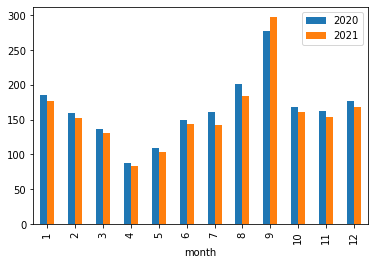

In [163]:
df_elec_chart_2020 = df_elec_2020[(df_elec_2020['year'].isin([2030]))]
df_elec_chart_2021 = df_elec_2021[df_elec_2021['year'].isin([2030])]
pd.concat([
    df_elec_chart_2020.groupby('month')['total'].mean().rename('2020'),
    df_elec_chart_2021.groupby('month')['total'].mean().rename('2021')
], axis=1).plot.bar()

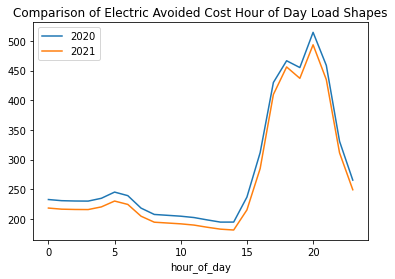

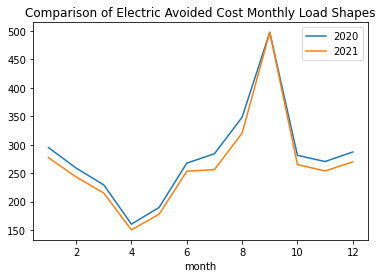

In [107]:
import matplotlib.pyplot as plt
df_elec_2020.groupby('hour_of_day')[column].mean().plot(label='2020')
df_elec_2021.groupby('hour_of_day')[column].mean().plot(label='2021')
plt.legend()
plt.title('Comparison of Electric Avoided Cost Hour of Day Load Shapes')
plt.figure()
df_elec_2020.groupby('month')[column].mean().plot(label='2020')
df_elec_2021.groupby('month')[column].mean().plot(label='2021')
plt.legend()
plt.title('Comparison of Electric Avoided Cost Monthly Load Shapes')
pass

In [138]:
value_cols = [c for c in df_elec_2020.columns if c not in ['year','month', 'hour_of_day', 'hour_of_year']]
print("2021's electricity costs as a percent of 2020")
df_elec_2021[value_cols].sum()/df_elec_2020[value_cols].sum()

2021's electricity costs as a percent of 2020


total                    0.943348
energy                   1.000000
losses                   1.000000
ancillary_services       1.000000
capacity                 0.964397
transmission             1.000000
distribution             1.000000
cap_and_trade            1.000000
ghg_adder_rebalancing    1.000000
methane_leakage          0.347222
marginal_ghg             1.000000
dtype: float64

<AxesSubplot:xlabel='month'>

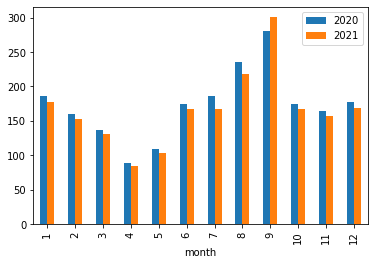

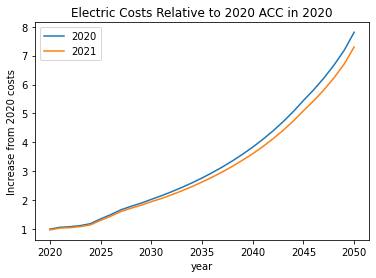

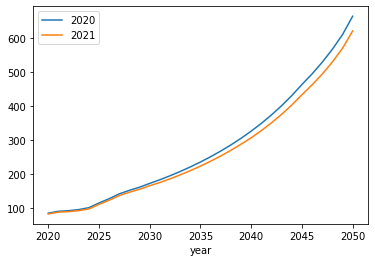

In [135]:
# Levelized
df_elec_2020_yearly = df_elec_2020.groupby('year')[column].mean() 
df_elec_2021_yearly = df_elec_2021.groupby('year')[column].mean()            
df_elec_2020_yearly_norm = df_elec_2020_yearly/df_elec_2020_yearly.loc[2020]
df_elec_2021_yearly_norm = df_elec_2021_yearly/df_elec_2020_yearly.loc[2020]
df_elec_2020_yearly_norm.plot(label='2020')                                 
df_elec_2021_yearly_norm.plot(label='2021')
plt.title('Electric Costs Relative to 2020 ACC in 2020')
plt.ylabel('Increase from 2020 costs')
plt.legend()
pass
plt.figure()
df_elec_2020_yearly.plot(label='2020')
df_elec_2021_yearly.plot(label='2021')
plt.legend()

## Gas Analysis

In [102]:
df_gas_2020 = get_filtered_acc_gas('2020', '2020', '2050')
df_gas_2021 = get_filtered_acc_gas('2021', '2020', '2050')

In [127]:
[c for c in df_gas_2020.columns if c not in ['year', 'month']]

['market', 't_d', 'environment', 'upstream_methane', 'total']

In [104]:
# Enter a column to check
column = 'total'

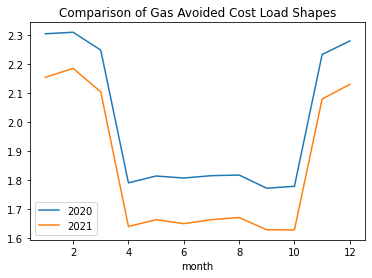

In [105]:
import matplotlib.pyplot as plt
df_gas_2020.groupby('month')[column].mean().plot(label='2020')
df_gas_2021.groupby('month')[column].mean().plot(label='2021')
plt.legend()
plt.title('Comparison of Gas Avoided Cost Load Shapes')
pass

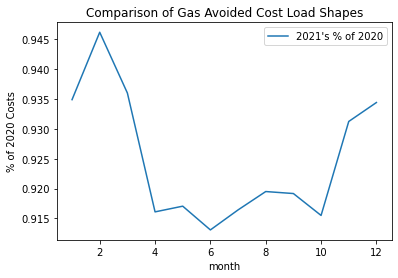

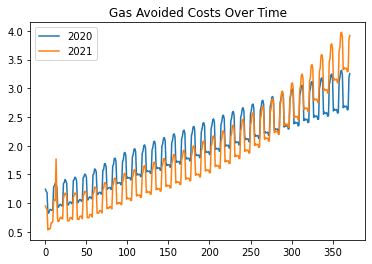

In [114]:
import matplotlib.pyplot as plt
(df_gas_2021.groupby('month')[column].mean()/df_gas_2020.groupby('month')[column].mean()).plot(label="2021's % of 2020")
plt.legend()
plt.title('Comparison of Gas Avoided Cost Load Shapes')
plt.ylabel('% of 2020 Costs')
pass
plt.figure()
df_gas_2020[column].plot(label='2020')
df_gas_2021[column].plot(label='2021')
plt.title('Gas Avoided Costs Over Time')
plt.legend()

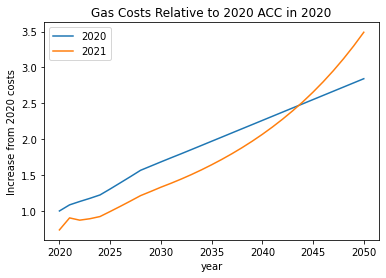

In [128]:
# Levelized
df_gas_2020_yearly = df_gas_2020.groupby('year')[column].sum()
df_gas_2021_yearly = df_gas_2021.groupby('year')[column].sum()
df_gas_2020_yearly_norm = df_gas_2020_yearly/df_gas_2020_yearly.loc[2020]
df_gas_2021_yearly_norm = df_gas_2021_yearly/df_gas_2020_yearly.loc[2020]
df_gas_2020_yearly_norm.plot(label='2020')
df_gas_2021_yearly_norm.plot(label='2021')
plt.title('Gas Costs Relative to 2020 ACC in 2020')
plt.ylabel('Increase from 2020 costs')
plt.legend()
pass

In [96]:
value_cols = [c for c in df_gas_2020.columns if c not in ['year','month']]
print("2021's gas costs as a percent of 2020")
df_gas_2021[value_cols].sum()/df_gas_2020[value_cols].sum()

2021's gas costs as a percent of 2020


market              1.000000
t_d                 1.000000
environment         0.661692
upstream_methane    0.743519
total               0.790624
dtype: float64

In [28]:
# Running with the ids that are associated with DEER load shapes
from flexvalue.examples import get_example_user_inputs_deer
from flexvalue import FlexValueRun

In [29]:
user_inputs_deer = get_example_user_inputs_deer(database_year='2020')

In [30]:
flx_run_2020 = FlexValueRun(database_year='2020')
outputs_table_deer_2020, outputs_table_totals_deer_2020, electric_benefits_deer_2020, gas_benefits_deer_2020 = flx_run_2020.get_results(user_inputs=user_inputs_deer)
outputs_table_deer_2020

,ID,load_shape,start_year,start_quarter,utility,climate_zone,units,eul,ntg,discount_rate,...,TRC (and PAC) Total Benefits ($),TRC Costs ($),PAC Costs ($),Electricity First Year Net Savings (MWh),Electricity Lifecycle Net Savings (MWh),Gas First Year Net Savings (Therms),Gas Lifecycle Net Savings (Therms),Electricity Lifecycle GHG Savings (Tons),Gas Lifecycle GHG Savings (Tons),Total Lifecycle GHG Savings (Tons)
0,deer_id_0,NONRES_HVAC_REFRIG_CHARGE,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,673077.60,12011.48,12943.63,950.000,8549.999,95.0,855.0,2202.994,5.13,2208.124
1,deer_id_1,RES_REFGFRZR_RECYCLING,2020,2,PGE,CZ3A,1.0,9,0.95,0.0766,...,1457187.67,24022.96,25887.26,1900.034,17100.305,190.0,1710.0,4698.525,10.26,4708.785
2,deer_id_2,RES_REFG_CHRG_DUCT_SEAL,2020,3,PGE,CZ3A,1.0,9,0.95,0.0766,...,2688431.07,36034.44,38830.89,2849.902,25649.122,285.0,2565.0,7508.371,15.39,7523.761
3,deer_id_3,NONRES_HVAC_SPLIT_PACKAGE_HP,2020,4,PGE,CZ3A,1.0,9,0.95,0.0766,...,2667446.44,48045.92,51774.52,3799.990,34199.914,380.0,3420.0,9104.367,20.52,9124.887
4,deer_id_4,RES_CLOTHESDISHWASHER,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,3673058.65,60057.40,64718.15,4749.978,42749.801,475.0,4275.0,11877.660,25.65,11903.310


In [35]:
flx_run_2021 = FlexValueRun(database_year='2021')
outputs_table_deer_2021, outputs_table_totals_deer_2021, electric_benefits_deer_2021, gas_benefits_deer_2021 = flx_run_2021.get_results(user_inputs=user_inputs_deer)
outputs_table_deer_2021

,ID,load_shape,start_year,start_quarter,utility,climate_zone,units,eul,ntg,discount_rate,...,TRC (and PAC) Total Benefits ($),TRC Costs ($),PAC Costs ($),Electricity First Year Net Savings (MWh),Electricity Lifecycle Net Savings (MWh),Gas First Year Net Savings (Therms),Gas Lifecycle Net Savings (Therms),Electricity Lifecycle GHG Savings (Tons),Gas Lifecycle GHG Savings (Tons),Total Lifecycle GHG Savings (Tons)
0,deer_id_0,NONRES_HVAC_REFRIG_CHARGE,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,632532.26,12011.48,12943.63,950.000,8549.999,95.0,855.0,2202.994,5.13,2208.124
1,deer_id_1,RES_REFGFRZR_RECYCLING,2020,2,PGE,CZ3A,1.0,9,0.95,0.0766,...,1409729.56,24022.96,25887.26,1900.034,17100.305,190.0,1710.0,4698.525,10.26,4708.785
2,deer_id_2,RES_REFG_CHRG_DUCT_SEAL,2020,3,PGE,CZ3A,1.0,9,0.95,0.0766,...,2583919.36,36034.44,38830.89,2849.902,25649.122,285.0,2565.0,7508.371,15.39,7523.761
3,deer_id_3,NONRES_HVAC_SPLIT_PACKAGE_HP,2020,4,PGE,CZ3A,1.0,9,0.95,0.0766,...,2533219.97,48045.92,51774.52,3799.990,34199.914,380.0,3420.0,9104.367,20.52,9124.887
4,deer_id_4,RES_CLOTHESDISHWASHER,2020,1,PGE,CZ3A,1.0,9,0.95,0.0766,...,3565474.16,60057.40,64718.15,4749.978,42749.801,475.0,4275.0,11877.660,25.65,11903.310


In [36]:
outputs_table_totals_deer_2020.round(2)

TRC                                               61.94
PAC                                               57.48
TRC (and PAC) Electric Benefits ($)         11147856.56
TRC (and PAC) Gas Benefits ($)                 11344.87
TRC (and PAC) Total Benefits ($)            11159201.43
TRC Costs ($)                                 180172.20
PAC Costs ($)                                 194154.45
Electricity First Year Net Savings (MWh)       14249.90
Electricity Lifecycle Net Savings (MWh)       128249.14
Gas First Year Net Savings (Therms)             1425.00
Gas Lifecycle Net Savings (Therms)             12825.00
Electricity Lifecycle GHG Savings (Tons)       35391.92
Gas Lifecycle GHG Savings (Tons)                  76.95
Total Lifecycle GHG Savings (Tons)             35468.87
dtype: float64

In [37]:
outputs_table_totals_deer_2021.round(2)

TRC                                               59.53
PAC                                               55.24
TRC (and PAC) Electric Benefits ($)         10716114.12
TRC (and PAC) Gas Benefits ($)                  8761.19
TRC (and PAC) Total Benefits ($)            10724875.31
TRC Costs ($)                                 180172.20
PAC Costs ($)                                 194154.45
Electricity First Year Net Savings (MWh)       14249.90
Electricity Lifecycle Net Savings (MWh)       128249.14
Gas First Year Net Savings (Therms)             1425.00
Gas Lifecycle Net Savings (Therms)             12825.00
Electricity Lifecycle GHG Savings (Tons)       35391.92
Gas Lifecycle GHG Savings (Tons)                  76.95
Total Lifecycle GHG Savings (Tons)             35468.87
dtype: float64